In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense, Flatten, BatchNormalization
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
train_dir =  'Skin_types train'
valid_dir = 'Skin_types valid'
test_dir = "Skin_types test"

In [65]:
def get_folder_list(source_dir):
    folder_list = [x for x in os.listdir(source_dir)]

    return folder_list


In [66]:
train_folder_list = get_folder_list(train_dir)
valid_folder_list = get_folder_list(valid_dir)
test_folder_list = get_folder_list(test_dir)

In [67]:
def get_folder_dict(train_folder, source_path):
    folder_dict = {}

    for folder in train_folder:
        folder_name = f'{folder}'
        folder_dict[folder_name] = os.path.join(source_path, f'{folder}')
    return folder_dict

In [68]:
train_folder_dict = get_folder_dict(train_folder_list, train_dir)
valid_folder_dict = get_folder_dict(valid_folder_list, valid_dir)
test_folder_dict = get_folder_dict(test_folder_list, test_dir)

In [69]:
print(train_folder_dict)

{'dry': 'Skin_types train\\dry', 'normal': 'Skin_types train\\normal', 'oily': 'Skin_types train\\oily'}


In [70]:
def number_of_images_per_class(folder_dict):
    for key, value in folder_dict.items():
        print(f'There are {len(os.listdir(value))} {key} images')

In [71]:
number_of_images_per_class(train_folder_dict)

There are 652 dry images
There are 1104 normal images
There are 1000 oily images


In [72]:
number_of_images_per_class(valid_folder_dict)

There are 71 dry images
There are 111 normal images
There are 80 oily images


In [73]:
number_of_images_per_class(test_folder_dict)

There are 35 dry images
There are 59 normal images
There are 40 oily images


In [74]:
def display_images( folder_dict, number_of_images):
    plt.figure(figsize = (8,8))
    for folder_name, folder_path in folder_dict.items():
        list_of_images = [image for image in os.listdir(folder_path) if image.endswith('.jpg')]
        random_images = random.sample(list_of_images, number_of_images)
        for i in range(len(random_images)):
            display_path = os.path.join(folder_path, random_images[i])
            read_image = cv2.imread(display_path)
            cvt_rgb = cv2.cvtColor(read_image, cv2.COLOR_BGR2RGB)
            plt.imshow(cvt_rgb)
            plt.title(f'{folder_name} image {i+1}')
            plt.axis('off')
            print(read_image.shape)
            plt.show()

(256, 256, 3)


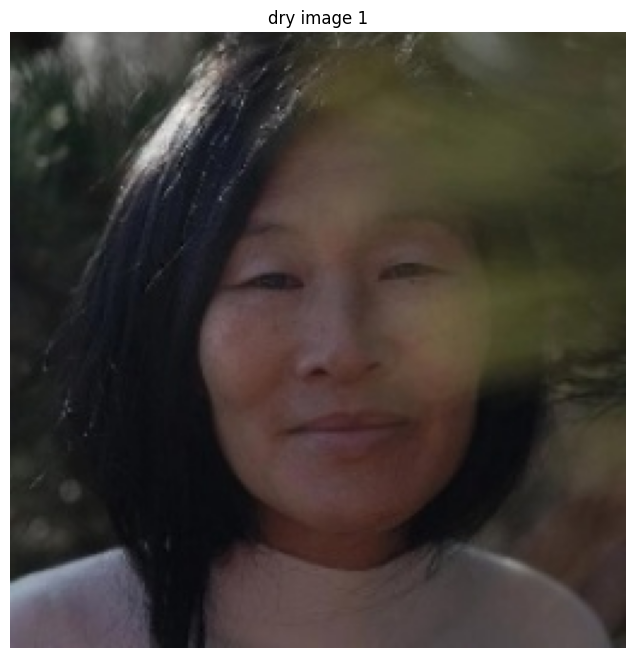

(256, 256, 3)


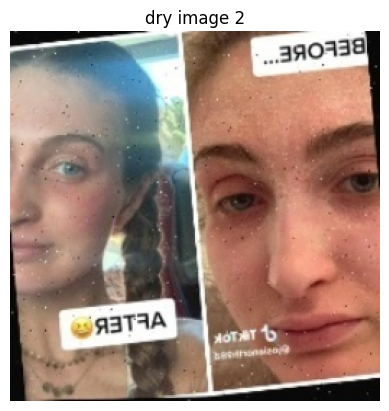

(256, 256, 3)


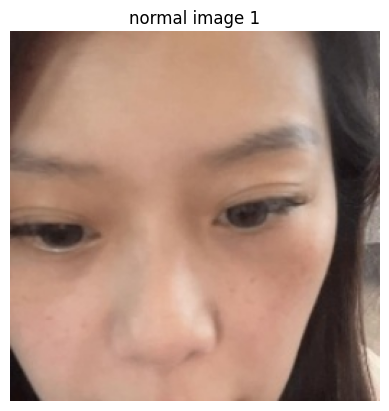

(256, 256, 3)


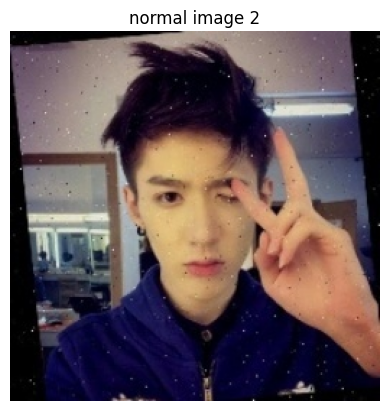

(256, 256, 3)


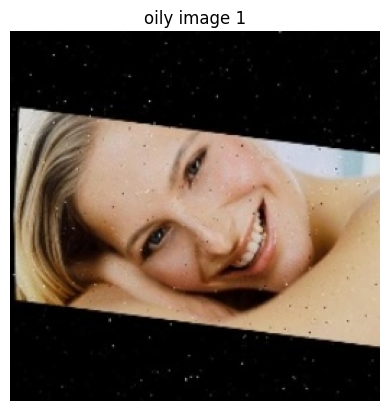

(256, 256, 3)


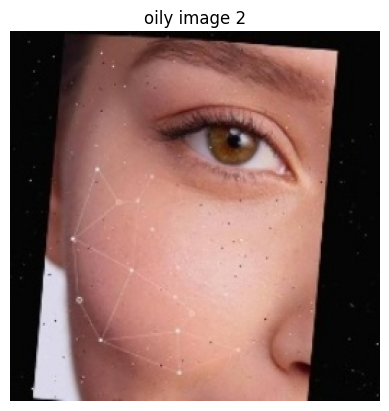

In [75]:
display_images(folder_dict=train_folder_dict, number_of_images=2)

(256, 256, 3)


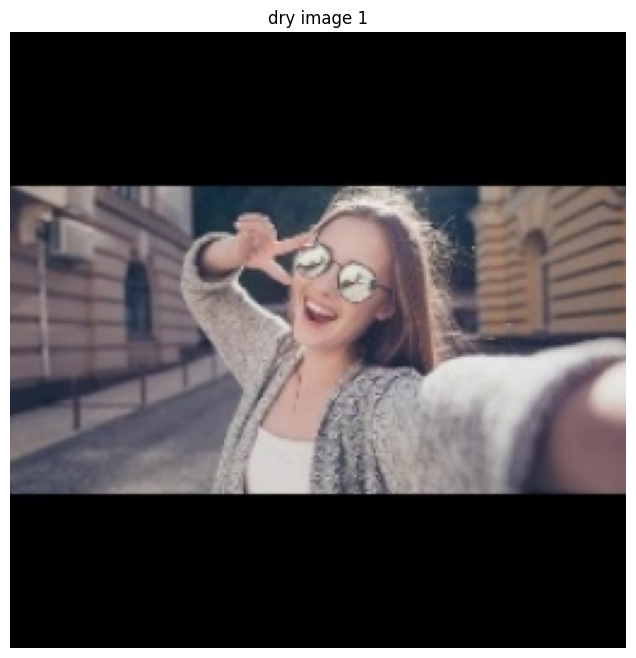

(256, 256, 3)


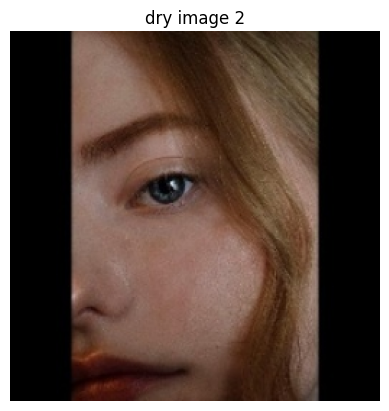

(256, 256, 3)


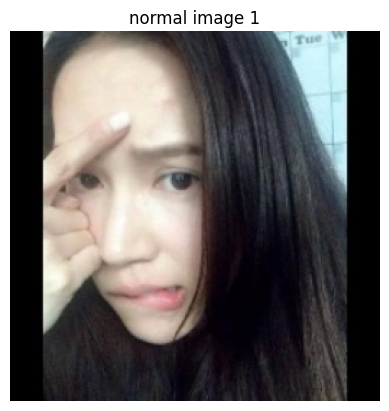

(256, 256, 3)


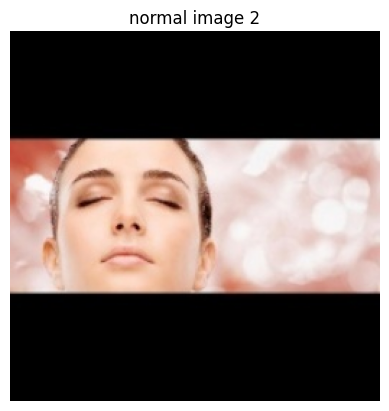

(256, 256, 3)


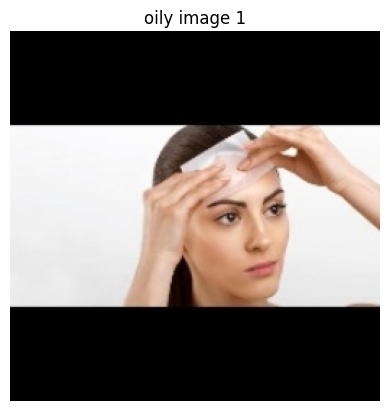

(256, 256, 3)


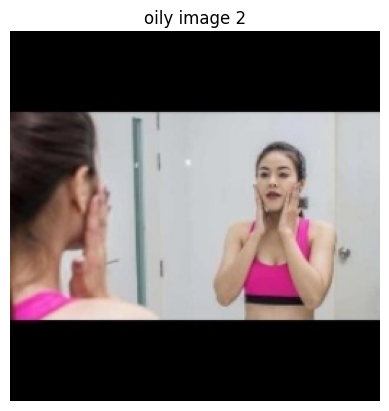

In [76]:
display_images(folder_dict=valid_folder_dict, number_of_images=2)

(256, 256, 3)


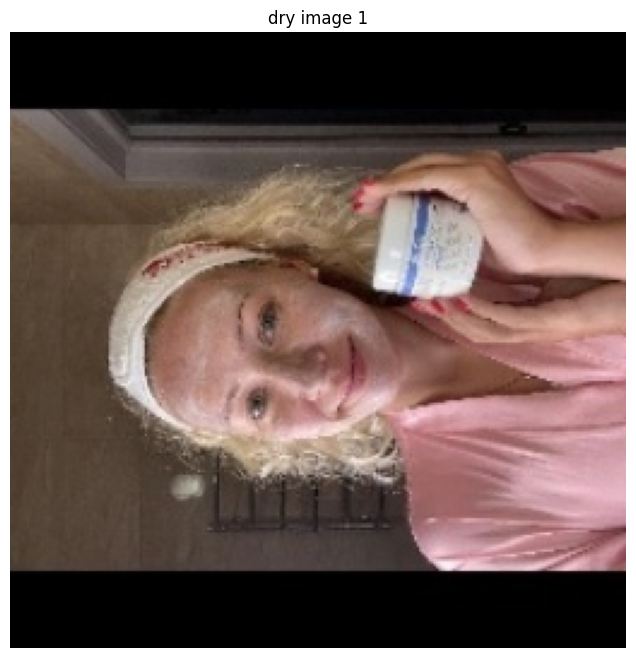

(256, 256, 3)


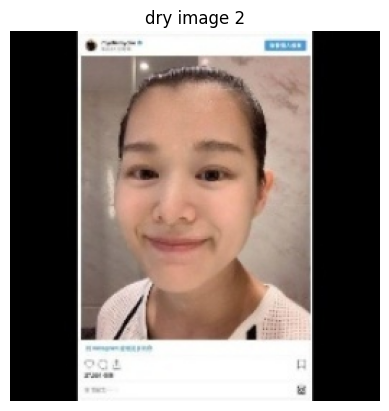

(256, 256, 3)


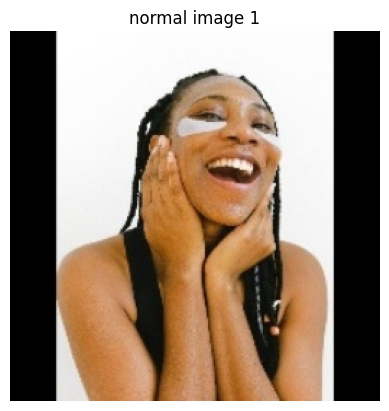

(256, 256, 3)


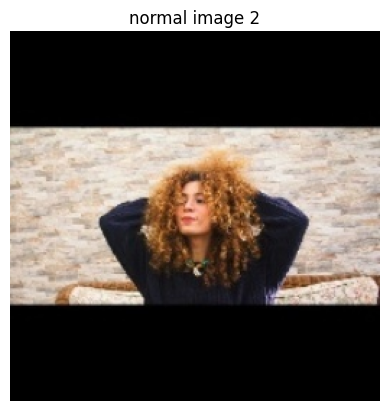

(256, 256, 3)


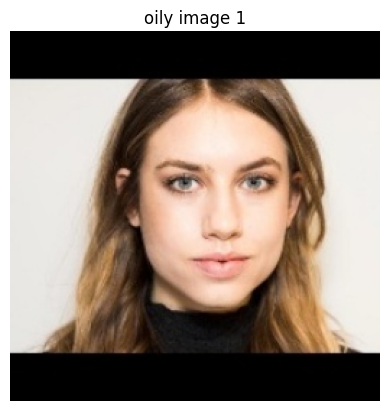

(256, 256, 3)


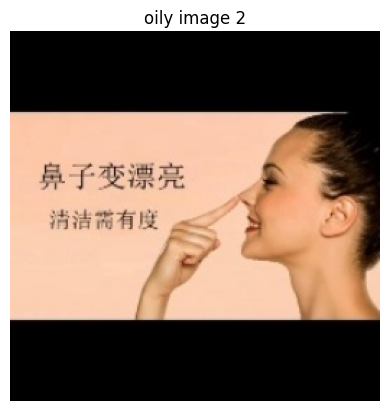

In [77]:
display_images(folder_dict=test_folder_dict, number_of_images=2)

In [78]:
def resize_image(folder_dict, height, width):
    for name, folder in folder_dict.items():
        image_list = [file for file in os.listdir(folder) if file.endswith('jpg')]

        for image in range(len(image_list)):
            image_path = os.path.join(folder, image_list[image])
            image_read = cv2.imread(image_path)
            resize_this_image = cv2.resize(image_read, (height,width))
            cv2.imwrite(image_path, resize_this_image)
            print('resizing image')
        print('resize completed')


In [79]:
resize_image(train_folder_dict, 256,256)

resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing i

In [80]:
resize_image(valid_folder_dict, 256,256)

resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing i

In [81]:
resize_image(test_folder_dict, 256,256)

resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resize completed
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing image
resizing

(256, 256, 3)


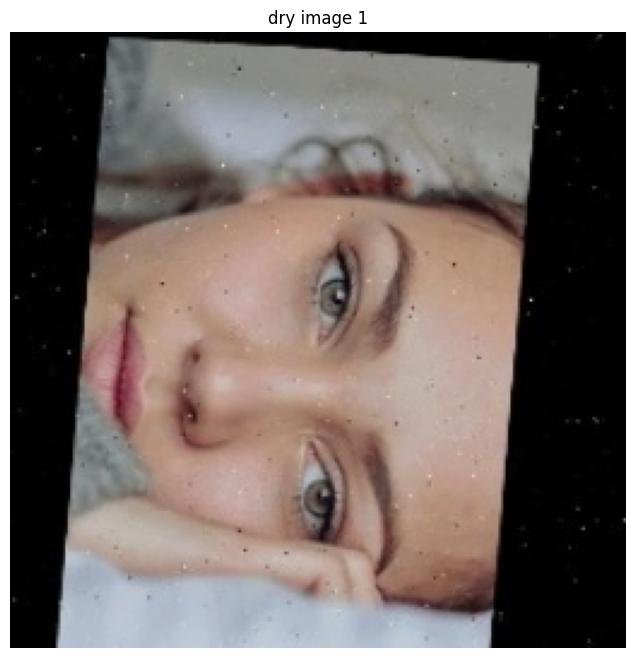

(256, 256, 3)


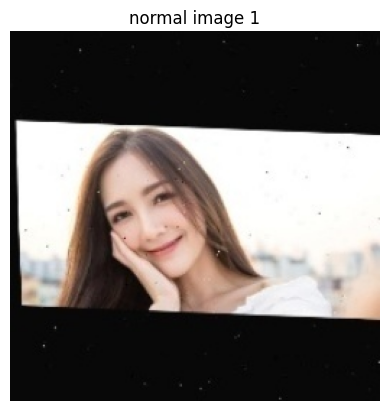

(256, 256, 3)


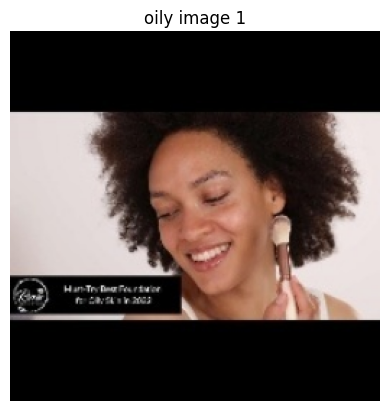

In [82]:
display_images(train_folder_dict,1)

(256, 256, 3)


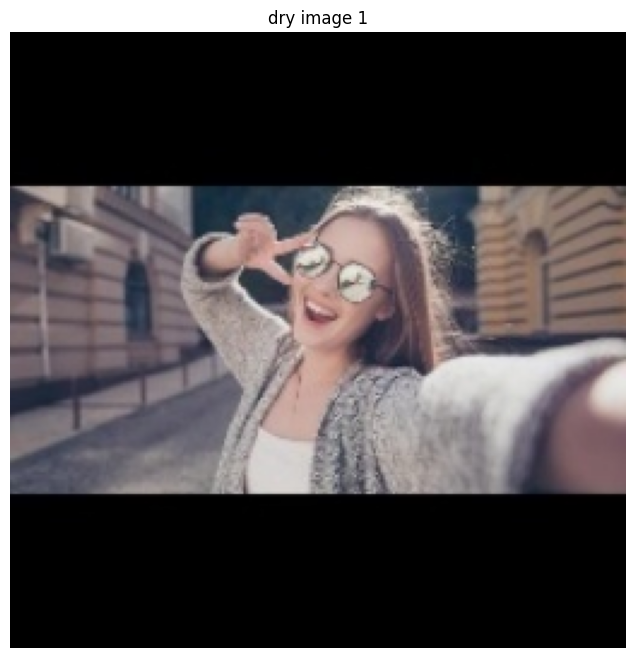

(256, 256, 3)


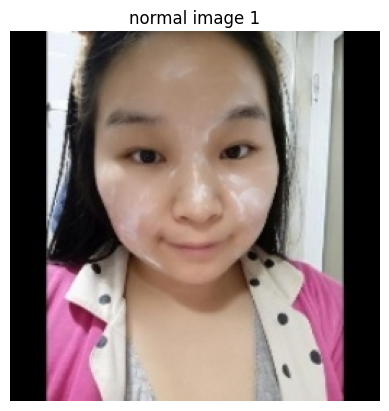

(256, 256, 3)


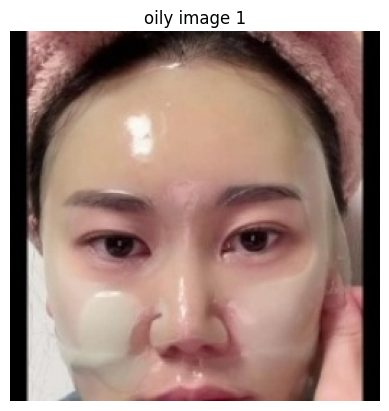

In [83]:
display_images(valid_folder_dict,1)

(256, 256, 3)


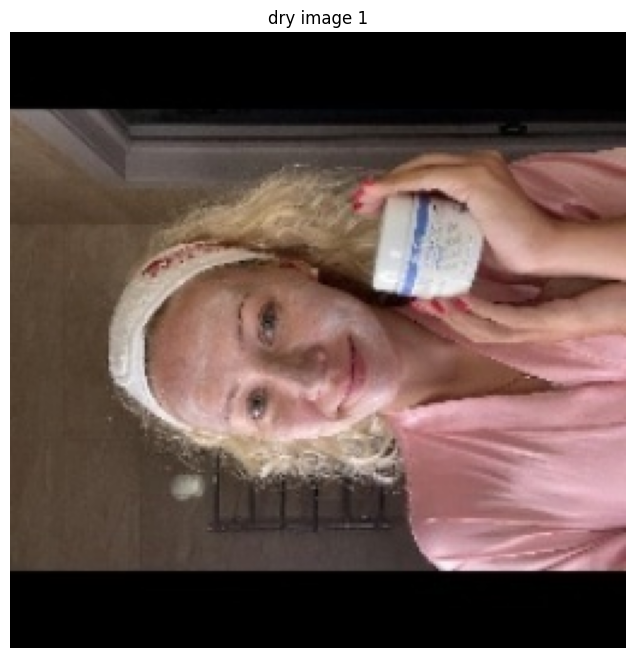

(256, 256, 3)


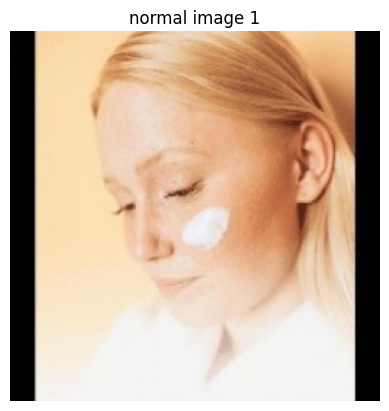

(256, 256, 3)


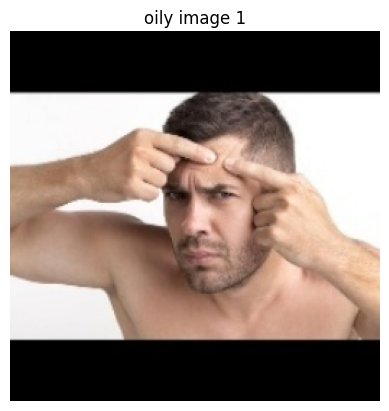

In [84]:
display_images(test_folder_dict,1)

In [85]:
def create_generator(source_dir, split, batch_size, target_size, class_mode):
    if split == 'train':
        train_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, shear_range=0.2, rotation_range=40, width_shift_range=0.2)
        train_generator = train_gen.flow_from_directory(directory = source_dir,batch_size = batch_size, target_size = target_size, class_mode = class_mode)
        return train_generator
    if split == 'test' or split =='valid':
        test_gen = ImageDataGenerator(rescale = 1./225)
        test_generator = test_gen.flow_from_directory(directory = source_dir,batch_size = batch_size, target_size = target_size, class_mode = class_mode, shuffle = False)
        return test_generator

In [86]:
train_generator = create_generator(source_dir=train_dir, split = 'train', batch_size=128, target_size=(256, 256), class_mode='categorical')

Found 2756 images belonging to 3 classes.


In [87]:
valid_generator = create_generator(source_dir=valid_dir, split = 'valid', batch_size=128, target_size=(256, 256), class_mode='categorical')

Found 262 images belonging to 3 classes.


In [88]:
test_generator = create_generator(source_dir=test_dir, split = 'test', batch_size=128, target_size=(256, 256), class_mode='categorical')

Found 134 images belonging to 3 classes.


In [89]:
input1 = Input(shape = (256, 256, 3))
flatten_1 = Flatten()(input1)
x_1 = Dense(128, activation = 'relu')(flatten_1)
x_2 = Dense(64, activation = 'relu')(x_1)
output1 = Dense(3, activation = 'softmax')(x_2)

model_1 = Model(inputs = input1, outputs = output1)

model_1.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 flatten_6 (Flatten)         (None, 196608)            0         
                                                                 
 dense_18 (Dense)            (None, 128)               25165952  
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 3)                 195       
                                                                 
Total params: 25174403 (96.03 MB)
Trainable params: 25174403 (96.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', 'AUC'])

In [91]:
model_1.fit(train_generator, epochs = 50, validation_data= valid_generator, callbacks=[EarlyStopping(patience=5, min_delta=0.001, monitor='val_loss', restore_best_weights=True)])

Epoch 1/50
22/22 [==============================] - 31s 1s/step - loss: 25.6732 - accuracy: 0.3462 - auc: 0.5145 - val_loss: 6.2399 - val_accuracy: 0.3206 - val_auc: 0.5125
Epoch 2/50
22/22 [==============================] - 20s 904ms/step - loss: 3.0694 - accuracy: 0.3501 - auc: 0.5250 - val_loss: 6.3262 - val_accuracy: 0.2710 - val_auc: 0.4798
Epoch 3/50
22/22 [==============================] - 20s 918ms/step - loss: 3.3996 - accuracy: 0.3429 - auc: 0.5075 - val_loss: 3.3907 - val_accuracy: 0.3740 - val_auc: 0.5320
Epoch 4/50
22/22 [==============================] - 20s 933ms/step - loss: 3.4220 - accuracy: 0.3589 - auc: 0.5239 - val_loss: 7.6674 - val_accuracy: 0.3015 - val_auc: 0.5142
Epoch 5/50
22/22 [==============================] - 20s 916ms/step - loss: 2.8765 - accuracy: 0.3599 - auc: 0.5273 - val_loss: 1.8172 - val_accuracy: 0.3092 - val_auc: 0.5212
Epoch 6/50
22/22 [==============================] - 20s 925ms/step - loss: 1.7390 - accuracy: 0.3462 - auc: 0.5226 - val_loss: 

In [92]:
prediction_1 = np.argmax(model_1.predict(test_generator), axis =1)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

accuracy_1 = accuracy_score(test_generator.classes, prediction_1)
classification_report_1 = classification_report(test_generator.classes, prediction_1)
print(accuracy_1)
print(classification_report_1)

2/2 [==============================] - 0s 42ms/step
0.417910447761194
              precision    recall  f1-score   support

           0       0.33      0.26      0.29        35
           1       0.49      0.64      0.55        59
           2       0.31      0.23      0.26        40

    accuracy                           0.42       134
   macro avg       0.38      0.38      0.37       134
weighted avg       0.39      0.42      0.40       134



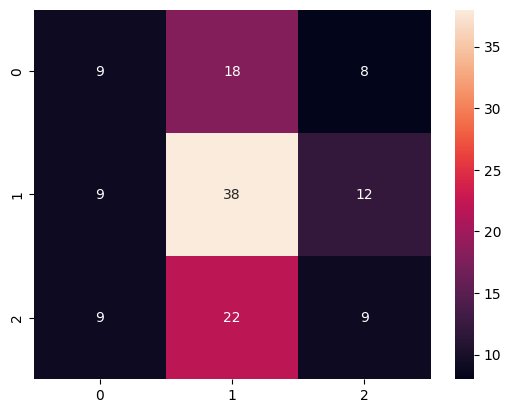

In [93]:
sns.heatmap(confusion_matrix(test_generator.classes, prediction_1), annot = True, fmt = '.0f')
plt.show()

In [94]:
from tensorflow.keras.layers import MaxPooling2D

In [95]:
def convolution_block(filters, kernel_size):
    def block(x):
        x = Conv2D(filters, kernel_size, padding='same', activation = 'relu')(x) 
        x = MaxPooling2D(2, 2)(x)
        return x
    return block

In [96]:
input2 = Input(shape=(256, 256, 3))
x = convolution_block(32, 5)(input2)  
x = convolution_block(64, 5)(x)
flatten_1 = Flatten()(x)
x_1 = Dense(128, activation = 'relu')(flatten_1)
x_2 = Dense(64, activation = 'relu')(x_1)
output2 = Dense(3, activation = 'softmax')(x_2)

model_2 = Model(inputs = input2, outputs = output2)

model_2.summary()


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_18 (Conv2D)          (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 128, 128, 64)      51264     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 262144)            0   

In [97]:
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', 'AUC'])
model_2.fit(train_generator, epochs = 50, validation_data= valid_generator, callbacks=[EarlyStopping(patience=5, min_delta=0.001, monitor='val_loss', restore_best_weights=True)])

Epoch 1/50
22/22 [==============================] - 126s 6s/step - loss: 2.2410 - accuracy: 0.3462 - auc: 0.5116 - val_loss: 1.0891 - val_accuracy: 0.4198 - val_auc: 0.5673
Epoch 2/50
22/22 [==============================] - 125s 6s/step - loss: 1.0772 - accuracy: 0.3966 - auc: 0.5845 - val_loss: 1.0985 - val_accuracy: 0.4237 - val_auc: 0.5736
Epoch 3/50
22/22 [==============================] - 125s 6s/step - loss: 1.0762 - accuracy: 0.3995 - auc: 0.5858 - val_loss: 1.0903 - val_accuracy: 0.4275 - val_auc: 0.5748
Epoch 4/50
22/22 [==============================] - 125s 6s/step - loss: 1.0768 - accuracy: 0.4006 - auc: 0.5819 - val_loss: 1.0954 - val_accuracy: 0.4389 - val_auc: 0.5778
Epoch 5/50
22/22 [==============================] - 124s 6s/step - loss: 1.0747 - accuracy: 0.4038 - auc: 0.5895 - val_loss: 1.0886 - val_accuracy: 0.4122 - val_auc: 0.5851
Epoch 6/50
22/22 [==============================] - 125s 6s/step - loss: 1.0740 - accuracy: 0.4078 - auc: 0.5935 - val_loss: 1.0877 - v

In [98]:
prediction_2 = np.argmax(model_2.predict(test_generator), axis =1)
accuracy_2 = accuracy_score(test_generator.classes, prediction_2)
classification_report_2 = classification_report(test_generator.classes, prediction_2)
print(accuracy_2)
print(classification_report_2)

2/2 [==============================] - 1s 58ms/step
0.44776119402985076
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.47      0.78      0.59        59
           2       0.39      0.35      0.37        40

    accuracy                           0.45       134
   macro avg       0.29      0.38      0.32       134
weighted avg       0.32      0.45      0.37       134



c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


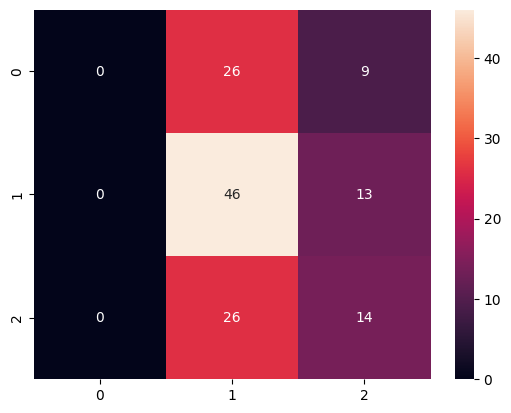

In [108]:
sns.heatmap(confusion_matrix(test_generator.classes, prediction_2), annot = True, fmt = '.0f')
plt.show()

In [99]:
input3 = Input(shape=(256, 256, 3))
x = convolution_block(32, 5)(input3)  
x = convolution_block(64, 5)(x)
x = convolution_block(128, 5)(x)
x = convolution_block(256, 5)(x)
flatten_1 = Flatten()(x)
x_1 = Dense(128, activation = 'relu')(flatten_1)
x_2 = Dense(64, activation = 'relu')(x_1)
output3= Dense(3, activation = 'softmax')(x_2)

model_3 = Model(inputs = input3, outputs = output3)

model_3.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 128, 128, 64)      51264     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 64, 64, 128)       2049

In [100]:
model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', 'AUC'])
model_3.fit(train_generator, epochs = 50, validation_data= valid_generator, callbacks=[EarlyStopping(patience=5, min_delta=0.001, monitor='val_loss', restore_best_weights=True)])

Epoch 1/50
22/22 [==============================] - 188s 8s/step - loss: 1.2779 - accuracy: 0.3973 - auc: 0.5691 - val_loss: 1.0852 - val_accuracy: 0.4237 - val_auc: 0.5678
Epoch 2/50
22/22 [==============================] - 187s 8s/step - loss: 1.0793 - accuracy: 0.4006 - auc: 0.5783 - val_loss: 1.0874 - val_accuracy: 0.4237 - val_auc: 0.5844
Epoch 3/50
22/22 [==============================] - 186s 8s/step - loss: 1.0755 - accuracy: 0.4006 - auc: 0.5842 - val_loss: 1.0880 - val_accuracy: 0.4237 - val_auc: 0.5838
Epoch 4/50
22/22 [==============================] - 186s 8s/step - loss: 1.0746 - accuracy: 0.4006 - auc: 0.5863 - val_loss: 1.0858 - val_accuracy: 0.4237 - val_auc: 0.5808
Epoch 5/50
22/22 [==============================] - 188s 9s/step - loss: 1.0746 - accuracy: 0.3988 - auc: 0.5846 - val_loss: 1.0873 - val_accuracy: 0.4237 - val_auc: 0.5861
Epoch 6/50
22/22 [==============================] - 187s 8s/step - loss: 1.0734 - accuracy: 0.4006 - auc: 0.5884 - val_loss: 1.0853 - v

In [106]:
prediction_3 = np.argmax(model_3.predict(test_generator), axis =1)
accuracy_3 = accuracy_score(test_generator.classes, prediction_3)
classification_report_3 = classification_report(test_generator.classes, prediction_3)
print(accuracy_3)
print(classification_report_3)

2/2 [==============================] - 2s 77ms/step
0.44029850746268656
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.44      1.00      0.61        59
           2       0.00      0.00      0.00        40

    accuracy                           0.44       134
   macro avg       0.15      0.33      0.20       134
weighted avg       0.19      0.44      0.27       134



c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


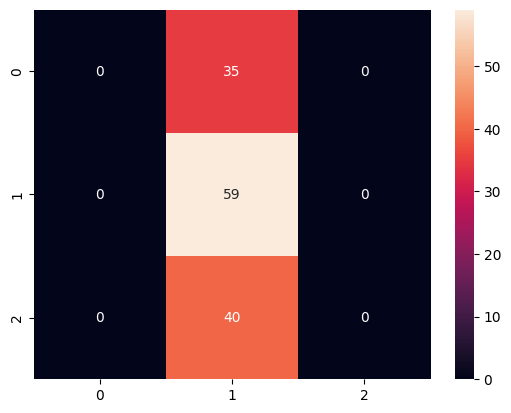

In [109]:
sns.heatmap(confusion_matrix(test_generator.classes, prediction_3), annot = True, fmt = '.0f')
plt.show()

In [103]:
from tensorflow.keras.applications import ResNet50V2
resnet50_1 = ResNet50V2(include_top = False, weights = 'imagenet', input_shape = (256, 256,3))
resnet50_output = resnet50_1.output
flatten_1 = Flatten()(resnet50_output)
x_1 = Dense(128, activation = 'relu')(flatten_1)
x_2 = Dense(64, activation = 'relu')(x_1)
output4= Dense(3, activation = 'softmax')(x_2)
model_4 = Model(inputs = resnet50_1.input, outputs = output4)
model_4.summary()


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_11[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 130, 130, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

In [105]:
model_4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])
model_4.fit(train_generator, epochs = 50, validation_data= valid_generator, callbacks=[EarlyStopping(patience=5, min_delta=0.001, monitor='val_loss', restore_best_weights=True)])

Epoch 1/50
22/22 [==============================] - 832s 37s/step - loss: 1.8018 - accuracy: 0.4017 - auc: 0.5686 - val_loss: 6608.6353 - val_accuracy: 0.3053 - val_auc: 0.4790
Epoch 2/50
22/22 [==============================] - 699s 31s/step - loss: 1.1006 - accuracy: 0.3850 - auc: 0.5790 - val_loss: 202.0734 - val_accuracy: 0.3053 - val_auc: 0.4790
Epoch 3/50
22/22 [==============================] - 670s 30s/step - loss: 1.1179 - accuracy: 0.3940 - auc: 0.5715 - val_loss: 11.8871 - val_accuracy: 0.3931 - val_auc: 0.5526
Epoch 4/50
22/22 [==============================] - 699s 32s/step - loss: 1.1043 - accuracy: 0.3951 - auc: 0.5793 - val_loss: 2.3819 - val_accuracy: 0.3855 - val_auc: 0.5780
Epoch 5/50
22/22 [==============================] - 677s 30s/step - loss: 1.1055 - accuracy: 0.4009 - auc: 0.5899 - val_loss: 2.4893 - val_accuracy: 0.3168 - val_auc: 0.4914
Epoch 6/50
22/22 [==============================] - 649s 29s/step - loss: 1.1016 - accuracy: 0.4129 - auc: 0.6006 - val_loss

In [107]:
prediction_4 = np.argmax(model_4.predict(test_generator), axis =1)
accuracy_4 = accuracy_score(test_generator.classes, prediction_4)
classification_report_4 = classification_report(test_generator.classes, prediction_4)
print(accuracy_4)
print(classification_report_4)

2/2 [==============================] - 6s 257ms/step
0.3880597014925373
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.45      0.69      0.55        59
           2       0.26      0.28      0.27        40

    accuracy                           0.39       134
   macro avg       0.24      0.32      0.27       134
weighted avg       0.27      0.39      0.32       134



c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


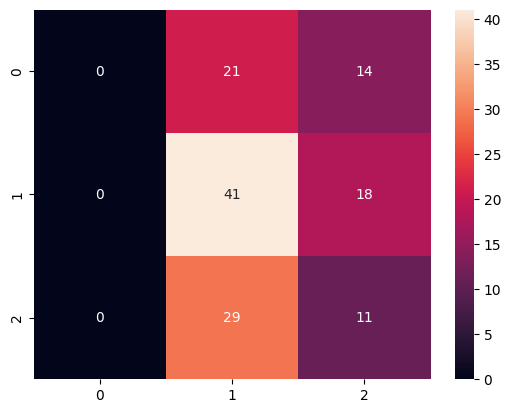

In [110]:
sns.heatmap(confusion_matrix(test_generator.classes, prediction_4), annot = True, fmt = '.0f')
plt.show()